# Smart Citizen API

Alle notwendigen Pakete (scdata) für die python API (Application Programming Interface) gibt es bereits auf GitHub.

https://github.com/fablabbcn/smartcitizen-data-framework

Das Paket lässt sich wie folgt via `pip` installieren:

`pip install git+https://github.com/fablabbcn/smartcitizen-data-framework.git`

### Suche nach Geräten in deiner Nähe
Ersetze im folgende Python Block *Würzburg* mit einer beliebigen anderen Stadt.

In [1]:
# Notwendige Pakete
import warnings
warnings.filterwarnings('ignore')
from scdata.io.read_api import ScApiDevice # Das Packet für die Smart Citizen API
from os.path import dirname, join

# Einstellbare Parameter
max_date = '2020-01-01' # Geraet hat nach diesem Datum Daten geliefert
my_city = 'Würzburg' # Waehle eine Stadt z.B. Barcelona

print ('Suche nach Geraeten in ' + str(my_city))
kits = ScApiDevice.get_world_map(city=my_city, max_date=max_date)
print ('Geraete informationen erfolgreich geladen')

for kit in kits:
    device = ScApiDevice(kit)
    print ("------ Kit-id:" + str(kit) + "------ ")
    print("Sensoren: " + str(device.get_device_sensors().values()))
    print("Aktiv seit: " + str(device.get_device_added_at()))
    print("Letzte Messung am: " + str(device.get_device_last_reading()))
    print("Geo-Koordinaten: " + str(device.get_device_lat_long()))
    print("-----------------------------------\n")

Suche nach Geraeten in Würzburg
Geraete informationen erfolgreich geladen
------ Kit-id:10264------ 
Sensoren: dict_values(['CCS811_VOCS', 'CCS811_ECO2', 'LIGHT', 'BATT', 'NOISE_A', 'PRESS', 'PM_1', 'PM_10', 'PM_25', 'HUM', 'TEMP'])
Aktiv seit: 2019-10-13T09:59:34Z
Letzte Messung am: 2020-05-21T09:40:38Z
Geo-Koordinaten: (49.7801362, 9.9647348)
-----------------------------------

------ Kit-id:13045------ 
Sensoren: dict_values(['CCS811_VOCS', 'CCS811_ECO2', 'LIGHT', 'BATT', 'NOISE_A', 'PRESS', 'PM_1', 'PM_10', 'PM_25', 'HUM', 'TEMP'])
Aktiv seit: 2020-07-05T11:25:45Z
Letzte Messung am: 2020-10-12T15:20:10Z
Geo-Koordinaten: (49.7835394476846, 9.93382831837158)
-----------------------------------



Genauere Sensorinformationen gibt es unter: https://smartcitizen.me/kits/13045 . (Ersetze Kit-id am Ende mit beliebiger anderer Kit-id). 

Für Würzburg gibt es zwei Sensoren: Sanderau: 13045, Hubland: 10264.

### Wie kann ich Daten herunterladen?
Im folgenden Codeblock laden wir uns Daten für ein bestimmtes Kit herunter.

In [2]:
import pandas as pd 
import numpy as np
from scdata.io.read_api import ScApiDevice

kit_id = '13045' # Kit-Id eintragen
frequency = '2H' # Zeit zwischen zwei aufeinanderfolgenden Messungen ('1D', '1H', '6H')


device = ScApiDevice(kit_id)

# Load
print("Downloading data fuer kit-id: " + str(kit_id))
kit_data = device.get_device_data(start_date = None,
                              end_date = None, 
                              frequency = frequency, 
                              clean_na = None)

print("Kit Daten :")
print(kit_data.iloc[1:3,1:4])

[SUCCESS]: Device 13045 loaded successfully from API
Kit Daten :
                           CCS811_ECO2  CCS811_VOCS        HUM
Time                                                          
2020-07-05 14:00:00+02:00   400.847458     0.101695  57.955847
2020-07-05 16:00:00+02:00   401.194915     0.084746  56.123729


### Daten visualisieren
Wir visualisieren die heruntergeladenden, Daten indem wir sie nach bestimmten Sensorgruppen geordnet untereinander auftragen.

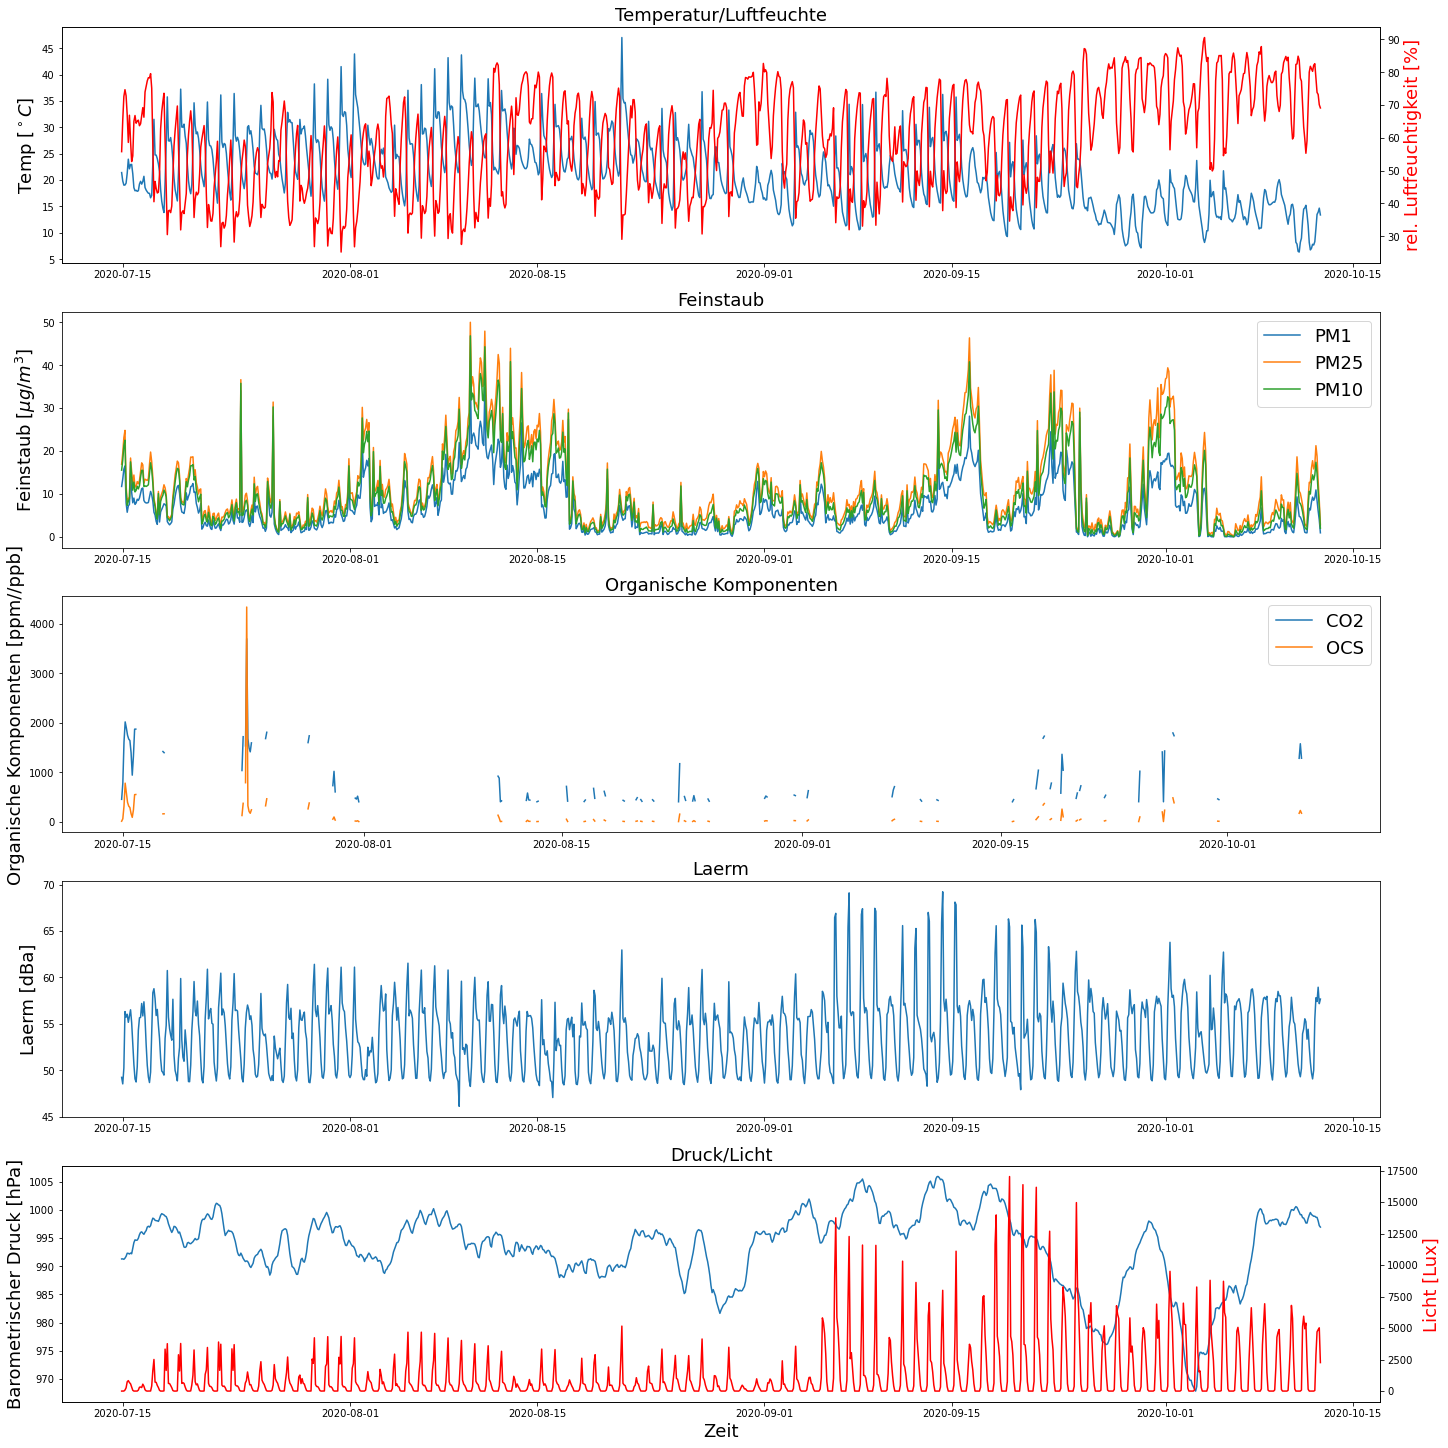

In [3]:
import matplotlib.pyplot as plt

# Daten auf bestimme Datumswerte zurecht schneiden
min_date = '2020-07-15'
max_date = '2020-11-01'
kit_data_plot = kit_data[(kit_data.index >= min_date) & (kit_data.index <= max_date)]

# Einige Sensorgruppen definieren
dust_sensor = ['PM_1', 'PM_10', 'PM_25']
gas_sensor = ['CCS811_ECO2', 'CCS811_VOCS']
temp_sensor = ['TEMP']
hum_sensor = ['HUM']
pressure_sensor = ['PRESS']
noise_sensor = ['NOISE_A']
light_sensor = ['LIGHT']

# ------------------ Plot -------------- 
label_font_size = 18
fig, axs = plt.subplots(5, 1, constrained_layout=True,figsize=(20,20))

# Temperatur vs Luftfeuchtigkeit
hum_color = "red"
axs[0].plot(kit_data_plot[temp_sensor])
axs[0].set_title('Temperatur/Luftfeuchte', fontsize=label_font_size)
axs[0].set_ylabel(r'Temp [$^\circ C$]',fontsize=label_font_size)  

ax02 = axs[0].twinx()  # Zweite gespiegelte axe
ax02.set_ylabel('rel. Luftfeuchtigkeit [%]', color=hum_color ,fontsize=label_font_size) 
ax02.plot(kit_data_plot[hum_sensor], color=hum_color)

# Feinstaub
axs[1].plot(kit_data_plot[dust_sensor])
axs[1].set_title('Feinstaub',fontsize=label_font_size)
axs[1].set_ylabel(r'Feinstaub [$\mu g/m^{3}$]',fontsize=label_font_size)
axs[1].legend(['PM1', 'PM25', 'PM10'], fontsize=label_font_size)

# Organische Komponenten
axs[2].plot(kit_data_plot[gas_sensor])
axs[2].set_title('Organische Komponenten',fontsize=label_font_size)
axs[2].set_ylabel('Organische Komponenten [ppm//ppb]',fontsize=label_font_size) 
axs[2].legend(['CO2', 'OCS'], fontsize=label_font_size)

# Laerm
axs[3].plot(kit_data_plot[noise_sensor])
axs[3].set_title('Laerm',fontsize=label_font_size)
axs[3].set_ylabel(r'Laerm [dBa]',fontsize=label_font_size)

# Licht vs Luftdruck
axs[4].plot(kit_data_plot[pressure_sensor]*10) # Transformiere zu hPa anstatt kPa
axs[4].set_title('Druck/Licht',fontsize=label_font_size)
axs[4].set_xlabel('Zeit',fontsize=label_font_size)
axs[4].set_ylabel(r'Barometrischer Druck [hPa]',fontsize=label_font_size) 

light_color = "red"
ax22 = axs[4].twinx() # Zweite gespiegelte axe
ax22.set_ylabel('Licht [Lux]', color=light_color ,fontsize=label_font_size) 
ax22.plot(kit_data_plot[light_sensor], color=light_color)

plt.show()